# Solar Sensor Data 2018-01-29
#### Using Karthik's 3D printed mount that holds all three sensors in the same plane (Nice work!)
#### Had data capture problems (it kept overflowing every 2 minutes or so, and I had to restart it so there are chunks missing out of the data)
#### The sensors were realigned around t= 818

In [77]:
%matplotlib inline
import pandas as pd
from natsort import natsorted
from glob import glob
import matplotlib.pyplot as plt
import matplotlib as mpl

In [95]:
################################################################################
base_size=15
mpl.rcParams['legend.fontsize'] = base_size
mpl.rcParams['figure.figsize'] = (10,7.5)
mpl.rcParams['figure.titlesize']=base_size+5
mpl.rcParams['xtick.labelsize']=base_size
mpl.rcParams['ytick.labelsize']=base_size
mpl.rcParams['font.size']=base_size
mpl.rcParams['axes.titlesize']=base_size
mpl.rcParams['axes.labelsize']=base_size
mpl.rcParams['lines.markersize'] = 3           # markersize, in points
mpl.rcParams['legend.markerscale'] = 1     # line width in points
mpl.rcParams['lines.markeredgewidth'] = 0.2 # the line width around the marker symbol
mpl.rcParams['lines.linewidth'] = 1.5
#####################################

In [96]:
files = glob("C:/git_repos/GLO/tracking/data/20180129/run**/*.csv")
files = natsorted(files)   
data = pd.read_csv(files[0],infer_datetime_format=True,index_col='time',parse_dates=['time'])
if len(files) > 1:
    for file in files[1:]:
        data = data.append(pd.read_csv(file,infer_datetime_format=True,index_col='time',parse_dates=['time']))
        
data['seconds'] = data.index.to_datetime() - data.index[0]
data.seconds = data.seconds.astype('timedelta64[ms]').divide(1000.0)

In [117]:
def plot_hist(data,title,units,bins=100):
    data.hist(bins=bins)
    std = data.std()
    plt.title(title+'\nstd = '+str(round(std,3))+' '+units)
    plt.xlabel(units)

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


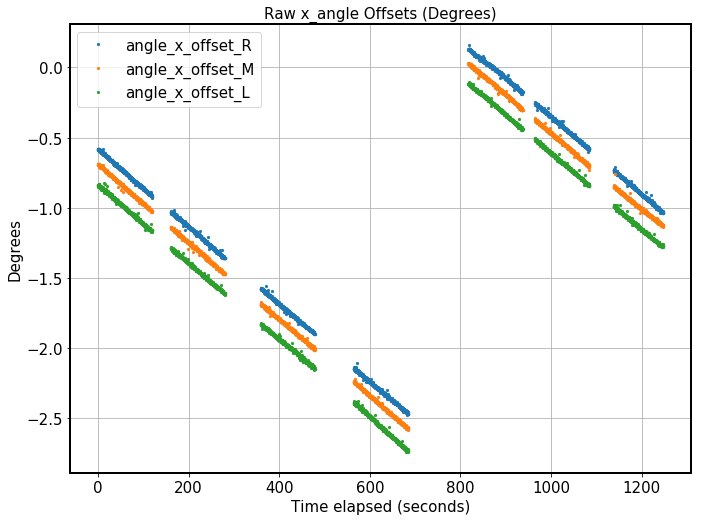

In [127]:
plt.plot(data.seconds,data.angle_x_raw_R,'o',label='angle_x_offset_R')
plt.plot(data.seconds,data.angle_x_raw_M,'o',label='angle_x_offset_M')
plt.plot(data.seconds,data.angle_x_raw_L,'o',label='angle_x_offset_L')
plt.title('Raw x_angle Offsets (Degrees)')
plt.xlabel('Time elapsed (seconds)')
plt.ylabel('Degrees')
plt.legend()

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


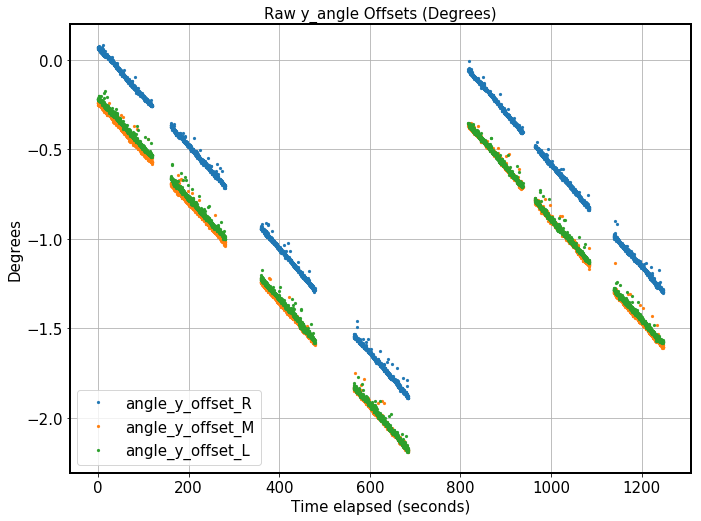

In [126]:
plt.plot(data.seconds,data.angle_y_raw_R,'o',label='angle_y_offset_R')
plt.plot(data.seconds,data.angle_y_raw_M,'o',label='angle_y_offset_M')
plt.plot(data.seconds,data.angle_y_raw_L,'o',label='angle_y_offset_L')
plt.xlabel('Time elapsed (seconds)')
plt.ylabel('Degrees')
plt.title('Raw y_angle Offsets (Degrees)')
plt.legend()

## Plot the solar intensity of all sensors.  It looks like the intensity on sensor L may be more sensitive to angle offset than the other two

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


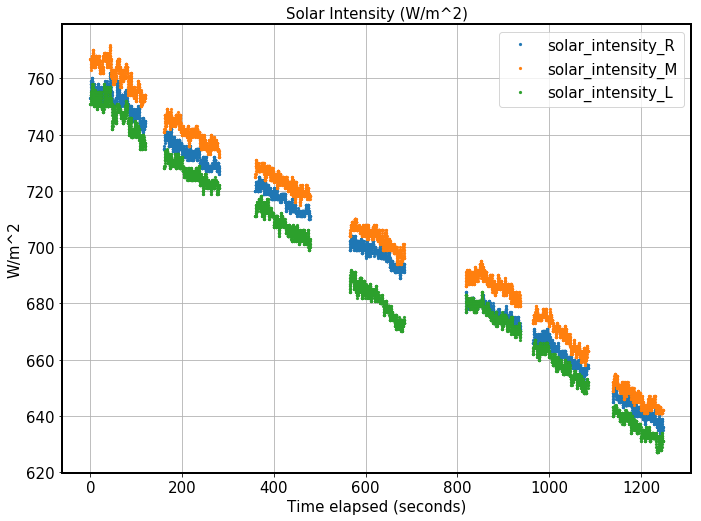

In [131]:
plt.plot(data.seconds,data.radiation_R,'o',label='solar_intensity_R')
plt.plot(data.seconds,data.radiation_M,'o',label='solar_intensity_M')
plt.plot(data.seconds,data.radiation_L,'o',label='solar_intensity_L')
plt.xlabel('Time elapsed (seconds)')
plt.ylabel('W/m^2')
plt.title('Solar Intensity (W/m^2)')
plt.legend()

Text(0.5,1,'Raw Difference between Sensors - X-angle offset (Deg)')

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


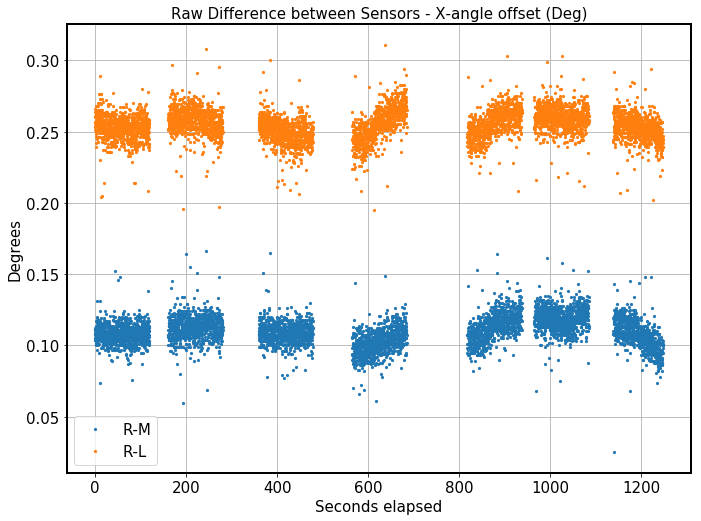

In [120]:
plt.plot(data.seconds,data.angle_x_raw_R-data.angle_x_raw_M,'o',label='R-M')
plt.plot(data.seconds,data.angle_x_raw_R-data.angle_x_raw_L,'o',label='R-L')
plt.xlabel('Seconds elapsed')
plt.ylabel('Degrees')
plt.legend()
plt.title('Raw Difference between Sensors - X-angle offset (Deg)')

## Plot the x-angle offset difference between sensor R and the other two sensors and subtract mean. Unfortunately the data capture was not working properly and there are big chunks missing, but it looks like there is a time and or angle offset-varying relationship between the sensors 

Text(0.5,1,'Difference between Sensors - X-angle offset (Deg)')

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


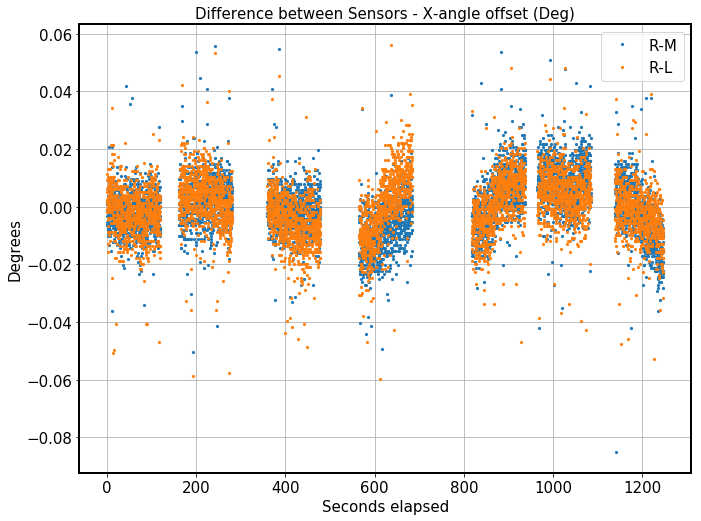

In [115]:
plt.plot(data.seconds,(data.angle_x_raw_R-data.angle_x_raw_M) - (data.angle_x_raw_R-data.angle_x_raw_M).mean(),'o',label='R-M')
plt.plot(data.seconds,(data.angle_x_raw_R-data.angle_x_raw_L) - (data.angle_x_raw_R-data.angle_x_raw_L).mean(),'o',label='R-L')
plt.xlabel('Seconds elapsed')
plt.ylabel('Degrees')
plt.legend()
plt.title('Difference between Sensors - X-angle offset (Deg)')

In [101]:
((data.angle_x_raw_R-data.angle_x_raw_M) - (data.angle_x_raw_R-data.angle_x_raw_M).mean()).describe()

count    6.106000e+03
mean    -1.225718e-15
std      1.004156e-02
min     -8.522093e-02
25%     -6.220930e-03
50%     -2.209302e-04
75%      6.779070e-03
max      5.577907e-02
dtype: float64

In [102]:
((data.angle_x_raw_R-data.angle_x_raw_L) - (data.angle_x_raw_R-data.angle_x_raw_L).mean()).describe()

count    6.106000e+03
mean     9.384894e-16
std      9.994844e-03
min     -5.976286e-02
25%     -5.762856e-03
50%      2.371438e-04
75%      6.237144e-03
max      5.623714e-02
dtype: float64

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


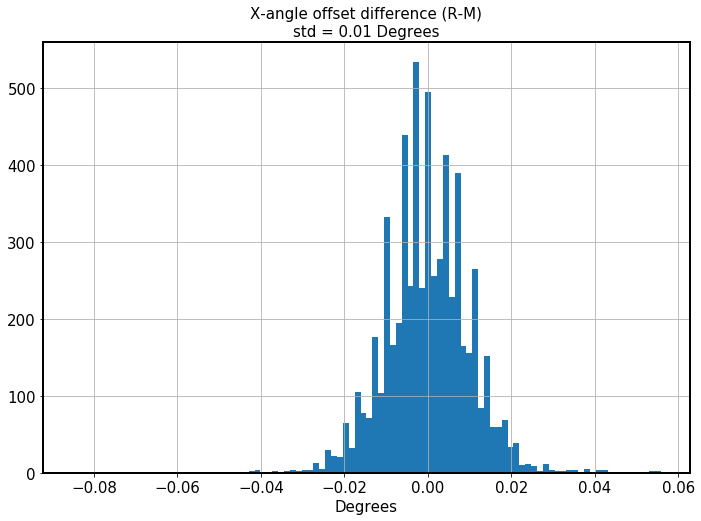

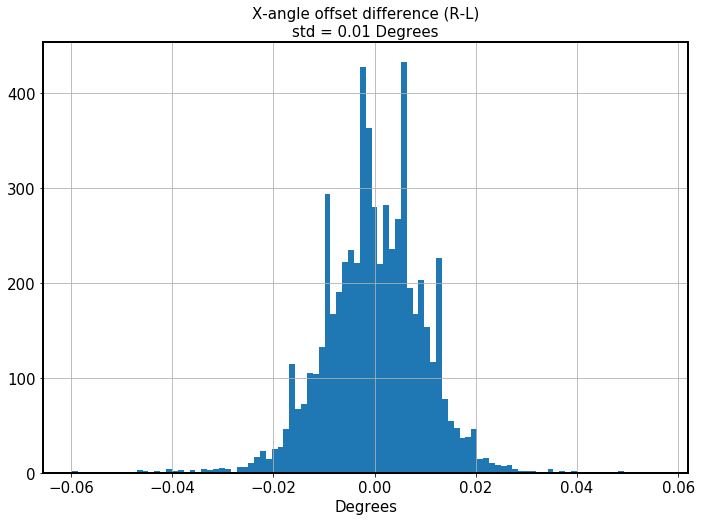

In [118]:
data_ = ((data.angle_x_raw_R-data.angle_x_raw_M) - (data.angle_x_raw_R-data.angle_x_raw_M).mean())
plot_hist(data_,'X-angle offset difference (R-M)','Degrees',bins=100)
plt.figure()
data_ = ((data.angle_x_raw_R-data.angle_x_raw_L) - (data.angle_x_raw_R-data.angle_x_raw_L).mean())
plot_hist(data_,'X-angle offset difference (R-L)','Degrees',bins=100)

# Same plot with y-angle offsets

Text(0.5,1,'Difference between Sensors - Y-angle offset (Deg)')

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


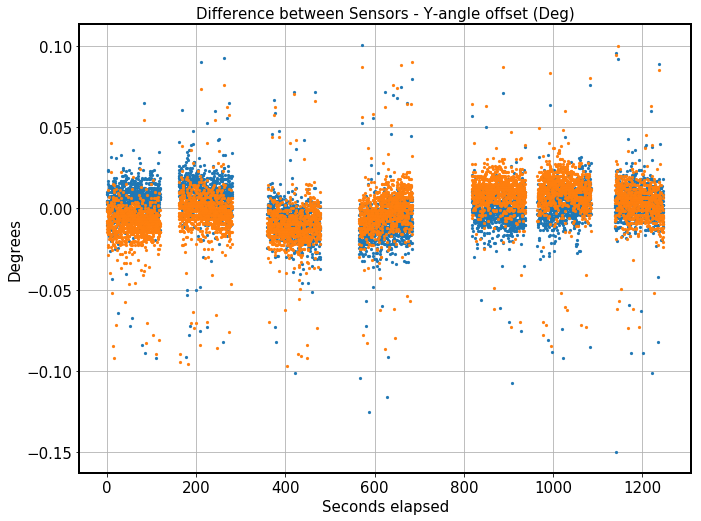

In [114]:
plt.plot(data.seconds,(data.angle_y_raw_R-data.angle_y_raw_M) - (data.angle_y_raw_R-data.angle_y_raw_M).mean(),'o',label='R-M')
plt.plot(data.seconds,(data.angle_y_raw_R-data.angle_y_raw_L) - (data.angle_y_raw_R-data.angle_y_raw_L).mean(),'o',label='R-L')
plt.xlabel('Seconds elapsed')
plt.ylabel('Degrees')
plt.title('Difference between Sensors - Y-angle offset (Deg)')

## Appears the y-angle offsets have a similar std to the x-angle offset differences, but a maximum value almost double that of the x-angle offset differences

In [105]:
((data.angle_y_raw_R-data.angle_y_raw_M) - (data.angle_y_raw_R-data.angle_y_raw_M).mean()).describe()

count    6.106000e+03
mean    -2.517784e-15
std      1.421559e-02
min     -1.501503e-01
25%     -7.150344e-03
50%      8.496561e-04
75%      7.849656e-03
max      1.008497e-01
dtype: float64

In [106]:
((data.angle_y_raw_R-data.angle_y_raw_L) - (data.angle_y_raw_R-data.angle_y_raw_L).mean()).describe()

count    6.106000e+03
mean    -1.245592e-15
std      1.507923e-02
min     -9.678497e-02
25%     -8.784966e-03
50%      2.150344e-04
75%      9.215034e-03
max      1.002150e-01
dtype: float64

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


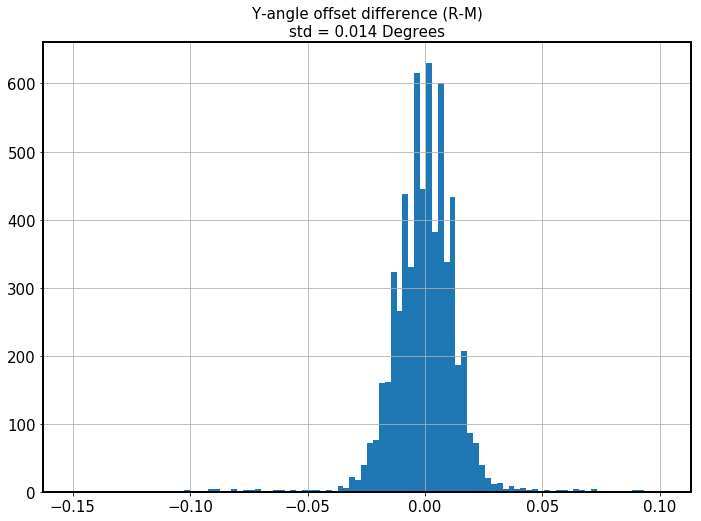

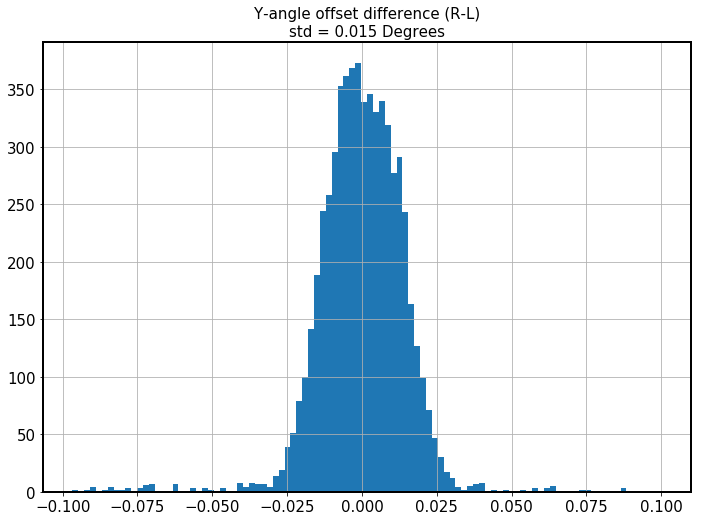

In [107]:
data_ = ((data.angle_y_raw_R-data.angle_y_raw_M) - (data.angle_y_raw_R-data.angle_y_raw_M).mean())
plot_hist(data_,'Y-angle offset difference (R-M)','Degrees',bins=100)
plt.figure()
data_ = ((data.angle_y_raw_R-data.angle_y_raw_L) - (data.angle_y_raw_R-data.angle_y_raw_L).mean())
plot_hist(data_,'Y-angle offset difference (R-L)','Degrees',bins=100)

## Same difference histogram for solar intensity (W/m^2). The resolution on intensity is much lower than the x and y-angle offsets

Text(0.5,1,'Difference between Sensors - Solar Intensity (W/m^2)')

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


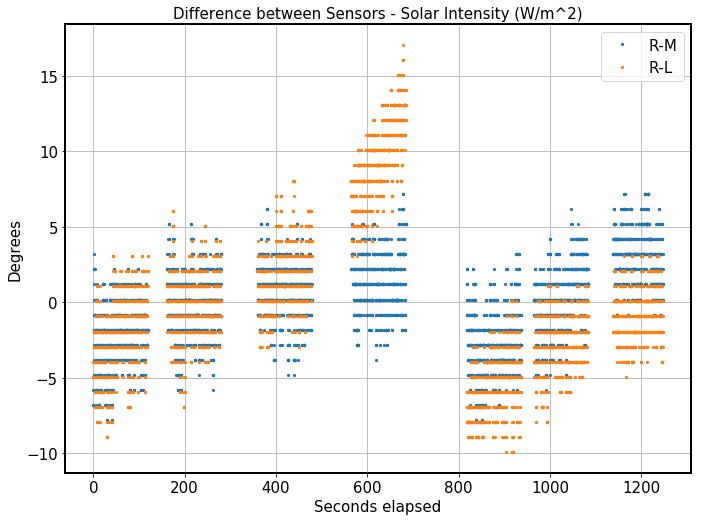

In [111]:
plt.plot(data.seconds,(data.radiation_R-data.radiation_M) - (data.radiation_R-data.radiation_M).mean(),'o',label='R-M')
plt.plot(data.seconds,(data.radiation_R-data.radiation_L) - (data.radiation_R-data.radiation_L).mean(),'o',label='R-L')
plt.xlabel('Seconds elapsed')
plt.ylabel('Degrees')
plt.legend()
plt.title('Difference between Sensors - Solar Intensity (W/m^2)')

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


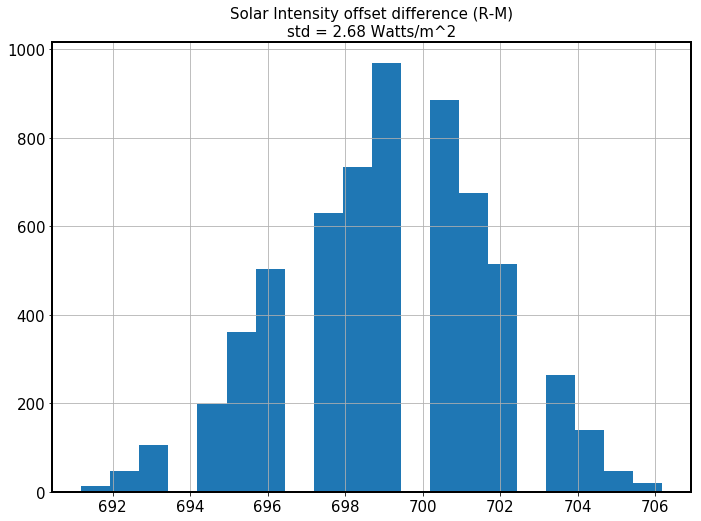

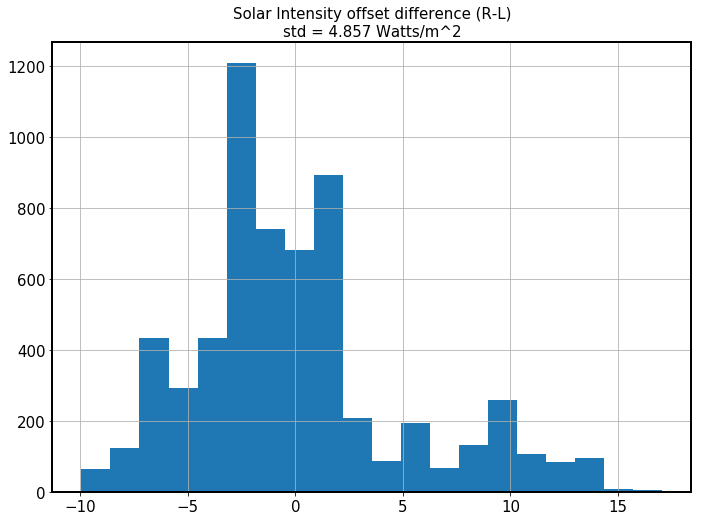

In [116]:
data_ = ((data.radiation_R-data.radiation_M) - (data.angle_x_raw_R-data.radiation_M).mean())
plot_hist(data_,'Solar Intensity offset difference (R-M)','Watts/m^2',bins=20)
plt.figure()
data_ = ((data.radiation_R-data.radiation_L) - (data.radiation_R-data.radiation_L).mean())
plot_hist(data_,'Solar Intensity offset difference (R-L)','Watts/m^2',bins=20)